## CIFAR10 데이터 로드

In [1]:
from keras.datasets import cifar10

(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

Using TensorFlow backend.


(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int64


## 데이터 확인

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)
fm._rebuild()


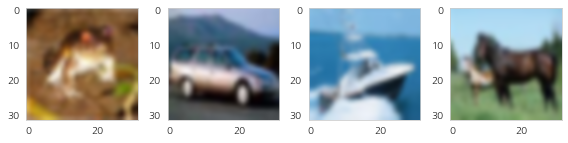

In [3]:
plt.figure(figsize=(8, 10))
plt.subplot(141)
plt.imshow(X_train[0], interpolation='bicubic')
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation='bicubic')
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation='bicubic')
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation='bicubic')
plt.grid(False)
plt.tight_layout()
plt.show()

## 자료형 변화 및 스케일링

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [5]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

print(Y_train.shape, Y_train.dtype)

(50000, 10) float32


In [6]:
Y_train[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 모형 구현

In [7]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [8]:
np.random.seed(0)

model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

## 트레이닝

In [10]:
%%time
hist = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test), verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 1192s - loss: 2.3777 - acc: 0.1509 - val_loss: 2.0414 - val_acc: 0.2426
Epoch 2/50
 - 1193s - loss: 1.9439 - acc: 0.2867 - val_loss: 1.7301 - val_acc: 0.3608
Epoch 3/50
 - 1195s - loss: 1.7769 - acc: 0.3611 - val_loss: 1.6198 - val_acc: 0.4232
Epoch 4/50
 - 1200s - loss: 1.6814 - acc: 0.4141 - val_loss: 1.5224 - val_acc: 0.4683
Epoch 5/50
 - 1203s - loss: 1.6054 - acc: 0.4654 - val_loss: 1.4375 - val_acc: 0.5226
Epoch 6/50
 - 1216s - loss: 1.5412 - acc: 0.5064 - val_loss: 1.5383 - val_acc: 0.5044
Epoch 7/50
 - 1224s - loss: 1.4867 - acc: 0.5368 - val_loss: 1.5410 - val_acc: 0.5252
Epoch 8/50
 - 1233s - loss: 1.4318 - acc: 0.5652 - val_loss: 1.3065 - val_acc: 0.5970
Epoch 9/50
 - 1221s - loss: 1.3961 - acc: 0.5826 - val_loss: 1.2593 - val_acc: 0.6317
Epoch 10/50
 - 1296s - loss: 1.3650 - acc: 0.6025 - val_loss: 1.2416 - val_acc: 0.6499
Epoch 11/50
 - 1286s - loss: 1.3243 - acc: 0.6239 - val_loss: 1.1982 - val_acc: 0.6635
Ep

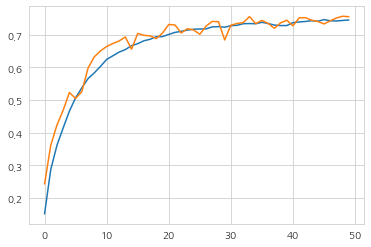

In [12]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

In [13]:
model.save("cifar10_2.hdf5")